In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/birdclef-2024/sample_submission.csv
/kaggle/input/birdclef-2024/eBird_Taxonomy_v2021.csv
/kaggle/input/birdclef-2024/train_metadata.csv
/kaggle/input/birdclef-2024/unlabeled_soundscapes/1872382287.ogg
/kaggle/input/birdclef-2024/unlabeled_soundscapes/161691311.ogg
/kaggle/input/birdclef-2024/unlabeled_soundscapes/884633066.ogg
/kaggle/input/birdclef-2024/unlabeled_soundscapes/1675425185.ogg
/kaggle/input/birdclef-2024/unlabeled_soundscapes/1469579221.ogg
/kaggle/input/birdclef-2024/unlabeled_soundscapes/1564606141.ogg
/kaggle/input/birdclef-2024/unlabeled_soundscapes/194233408.ogg
/kaggle/input/birdclef-2024/unlabeled_soundscapes/2003586554.ogg
/kaggle/input/birdclef-2024/unlabeled_soundscapes/1459749597.ogg
/kaggle/input/birdclef-2024/unlabeled_soundscapes/33854460.ogg
/kaggle/input/birdclef-2024/unlabeled_soundscapes/1163678028.ogg
/kaggle/input/birdclef-2024/unlabeled_soundscapes/1682474551.ogg
/kaggle/input/birdclef-2024/unlabeled_soundscapes/825970922.ogg
/kaggle/inp

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_metadata = pd.read_csv('/kaggle/input/birdclef-2024/train_metadata.csv')

In [4]:
ebird_taxonomy = pd.read_csv('/kaggle/input/birdclef-2024/eBird_Taxonomy_v2021.csv')

In [5]:
train_metadata.head(10)

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,url,filename
0,asbfly,[],['call'],39.2297,118.1987,Muscicapa dauurica,Asian Brown Flycatcher,Matt Slaymaker,Creative Commons Attribution-NonCommercial-Sha...,5.0,https://www.xeno-canto.org/134896,asbfly/XC134896.ogg
1,asbfly,[],['song'],51.4030,104.6401,Muscicapa dauurica,Asian Brown Flycatcher,Magnus Hellström,Creative Commons Attribution-NonCommercial-Sha...,2.5,https://www.xeno-canto.org/164848,asbfly/XC164848.ogg
2,asbfly,[],['song'],36.3319,127.3555,Muscicapa dauurica,Asian Brown Flycatcher,Stuart Fisher,Creative Commons Attribution-NonCommercial-Sha...,2.5,https://www.xeno-canto.org/175797,asbfly/XC175797.ogg
3,asbfly,[],['call'],21.1697,70.6005,Muscicapa dauurica,Asian Brown Flycatcher,vir joshi,Creative Commons Attribution-NonCommercial-Sha...,4.0,https://www.xeno-canto.org/207738,asbfly/XC207738.ogg
4,asbfly,[],['call'],15.5442,73.7733,Muscicapa dauurica,Asian Brown Flycatcher,Albert Lastukhin & Sergei Karpeev,Creative Commons Attribution-NonCommercial-Sha...,4.0,https://www.xeno-canto.org/209218,asbfly/XC209218.ogg
5,asbfly,[],['call'],15.5442,73.7733,Muscicapa dauurica,Asian Brown Flycatcher,Albert Lastukhin & Sergei Karpeev,Creative Commons Attribution-NonCommercial-Sha...,4.0,https://www.xeno-canto.org/209219,asbfly/XC209219.ogg
6,asbfly,[],['clicks its bill'],42.5275,130.6920,Muscicapa dauurica,Asian Brown Flycatcher,Albert Lastukhin,Creative Commons Attribution-NonCommercial-Sha...,3.0,https://www.xeno-canto.org/267679,asbfly/XC267679.ogg
7,asbfly,[],"['call', 'male', 'song']",44.3602,132.7989,Muscicapa dauurica,Asian Brown Flycatcher,Albert Lastukhin,Creative Commons Attribution-NonCommercial-Sha...,4.0,https://www.xeno-canto.org/267680,asbfly/XC267680.ogg
8,asbfly,[],"['call', 'male', 'song']",44.3602,132.7989,Muscicapa dauurica,Asian Brown Flycatcher,Albert Lastukhin,Creative Commons Attribution-NonCommercial-Sha...,4.0,https://www.xeno-canto.org/267681,asbfly/XC267681.ogg
9,asbfly,[],['alarm call'],42.5275,130.6920,Muscicapa dauurica,Asian Brown Flycatcher,Albert Lastukhin,Creative Commons Attribution-NonCommercial-Sha...,4.0,https://www.xeno-canto.org/267682,asbfly/XC267682.ogg


In [6]:
ebird_taxonomy.head(10)

,TAXON_ORDER,CATEGORY,SPECIES_CODE,PRIMARY_COM_NAME,SCI_NAME,ORDER1,FAMILY,SPECIES_GROUP,REPORT_AS
0,1,species,ostric2,Common Ostrich,Struthio camelus,Struthioniformes,Struthionidae (Ostriches),Ostriches,NaN
1,6,species,ostric3,Somali Ostrich,Struthio molybdophanes,Struthioniformes,Struthionidae (Ostriches),NaN,NaN
2,7,slash,y00934,Common/Somali Ostrich,Struthio camelus/molybdophanes,Struthioniformes,Struthionidae (Ostriches),NaN,NaN
3,8,species,grerhe1,Greater Rhea,Rhea americana,Rheiformes,Rheidae (Rheas),Rheas,NaN
4,14,species,lesrhe2,Lesser Rhea,Rhea pennata,Rheiformes,Rheidae (Rheas),NaN,NaN
5,15,issf,lesrhe4,Lesser Rhea (Puna),Rhea pennata tarapacensis/garleppi,Rheiformes,Rheidae (Rheas),NaN,lesrhe2
6,18,issf,lesrhe3,Lesser Rhea (Darwin's),Rhea pennata pennata,Rheiformes,Rheidae (Rheas),NaN,lesrhe2
7,19,species,tabtin1,Tawny-breasted Tinamou,Nothocercus julius,Tinamiformes,Tinamidae (Tinamous),Tinamous,NaN
8,20,species,higtin1,Highland Tinamou,Nothocercus bonapartei,Tinamiformes,Tinamidae (Tinamous),NaN,NaN
9,21,issf,higtin2,Highland Tinamou (South American),Nothocercus bonapartei [bonapartei Group],Tinamiformes,Tinamidae (Tinamous),NaN,higtin1


In [16]:
# Selecting relevant columns from train_metadata
relevant_data = train_metadata[['primary_label', 'latitude', 'longitude', 'author', 'filename']]
relevant_data

,primary_label,latitude,longitude,author,filename
0,asbfly,39.2297,118.1987,Matt Slaymaker,asbfly/XC134896.ogg
1,asbfly,51.4030,104.6401,Magnus Hellström,asbfly/XC164848.ogg
2,asbfly,36.3319,127.3555,Stuart Fisher,asbfly/XC175797.ogg
3,asbfly,21.1697,70.6005,vir joshi,asbfly/XC207738.ogg
4,asbfly,15.5442,73.7733,Albert Lastukhin & Sergei Karpeev,asbfly/XC209218.ogg
...,...,...,...,...,...
24454,zitcis1,43.5925,4.5434,Chèvremont Fabian,zitcis1/XC845747.ogg
24455,zitcis1,43.5925,4.5434,Chèvremont Fabian,zitcis1/XC845817.ogg
24456,zitcis1,51.1207,4.5607,Wim Jacobs,zitcis1/XC856176.ogg
24457,zitcis1,41.5607,-8.4236,Jorge Leitão,zitcis1/XC856723.ogg


In [17]:
import pandas as pd
import numpy as np

# Assuming there are 182 unique bird species in the primary_label column of relevant_data
bird_ids = relevant_data['primary_label'].unique()

# Simulating a sample soundscape data
soundscape_data = {
    'row_id': ['soundscape_001_010', 'soundscape_002_020']
}

# Adding bird_id columns with a default probability of 0.5 for simplicity
for bird_id in bird_ids:
    soundscape_data[bird_id] = [0.5, 0.5]

# Creating DataFrame
sample_submission = pd.DataFrame(soundscape_data)
sample_submission

,row_id,asbfly,ashdro1,ashpri1,ashwoo2,asikoe2,asiope1,aspfly1,aspswi1,barfly1,...,whbwoo2,whcbar1,whiter2,whrmun,whtkin2,woosan,wynlau1,yebbab1,yebbul3,zitcis1
0,soundscape_001_010,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
1,soundscape_002_020,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


Exploratory Data Analysis (EDA)

In [18]:
# Descriptive statistics for numerical columns
relevant_data.describe()

,latitude,longitude
count,24081.000000,24081.000000
mean,32.537040,43.640699
std,19.440382,50.191352
min,-43.524000,-171.765400
25%,17.160100,2.545700
50%,37.155100,26.687600
75%,49.114400,85.319300
max,71.964000,177.447800


In [19]:
# Count of unique bird species

relevant_data['primary_label'].nunique()

182

In [20]:
# Top 10 bird species with the most recordings

relevant_data['primary_label'].value_counts().head(10)

primary_label
hoopoe     500
grewar3    500
houspa     500
blrwar1    500
grnsan     500
comgre     500
graher1    500
litgre1    500
eurcoo     500
comkin1    500
Name: count, dtype: int64

In [21]:
# Distribution of recordings by author (top 10)

relevant_data['author'].value_counts().head(10)

author
José Carlos Sires         915
Albert Lastukhin          913
Stanislas Wroza           745
Mike Nelson               671
Bram Piot                 519
Sreekumar Chirukandoth    398
Jelle Scharringa          331
Nelson Conceição          315
Vivek Puliyeri            304
Greg Irving               303
Name: count, dtype: int64

In [22]:
# Geographic distribution analysis: Number of unique locations (latitude, longitude pairs)

relevant_data.groupby(['latitude', 'longitude']).ngroups

9360

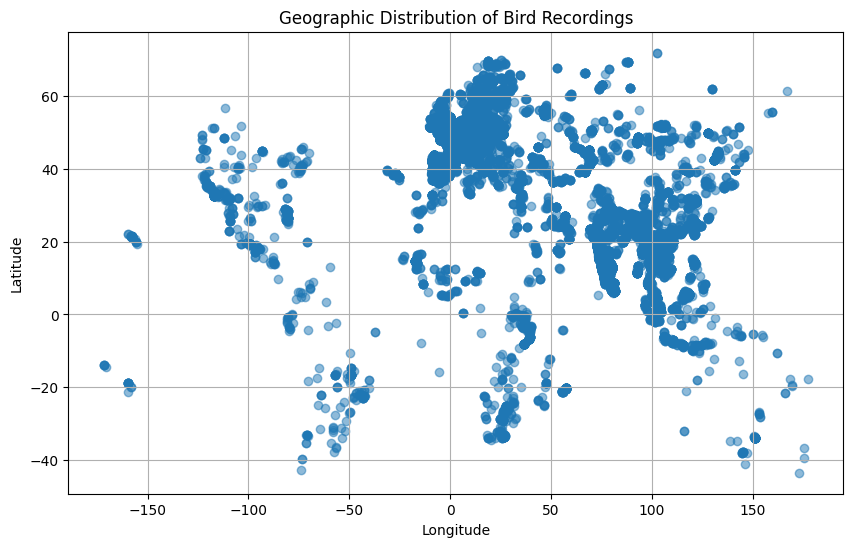

In [23]:
# Visualization of geographic distribution of recordings
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(relevant_data['longitude'], relevant_data['latitude'], alpha=0.5)
plt.title('Geographic Distribution of Bird Recordings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

The exploratory data analysis (EDA) provided insights :

- The dataset comprises recordings from 182 unique bird species.

- The geographical coordinates (latitude and longitude) of the recordings vary widely, with latitudes ranging from -43.52 to 71.96 and longitudes from -171.77 to 177.45.

- The top 10 bird species in terms of the number of recordings each have 500 recordings.

- The authors José Carlos Sires and Albert Lastukhin are the most prolific, contributing 915 and 913 recordings, respectively.

- There are 9360 unique recording locations, indicating a diverse range of habitats and environments.

- The geographic distribution plot shows recordings spread across various parts of the world, though there is a clustering in certain areas, suggesting regions with higher research or birdwatching activity.

Geographical analysis to explore the distribution of bird species across different locations

In [24]:
# Calculating the number of unique bird species per location

location_species_count = relevant_data.groupby(['latitude', 'longitude'])['primary_label'].nunique().reset_index()
location_species_count.rename(columns={'primary_label': 'species_count'}, inplace=True)

# Displaying the first few rows of the DataFrame with species count per location
location_species_count.head()

,latitude,longitude,species_count
0,-43.5240,172.6540,1
1,-42.6509,-74.0554,1
2,-41.2276,146.3032,1
3,-39.8470,-73.3098,1
4,-39.4053,175.4158,1


Visualize this data on a map to better understand the geographical distribution and concentration of bird species.

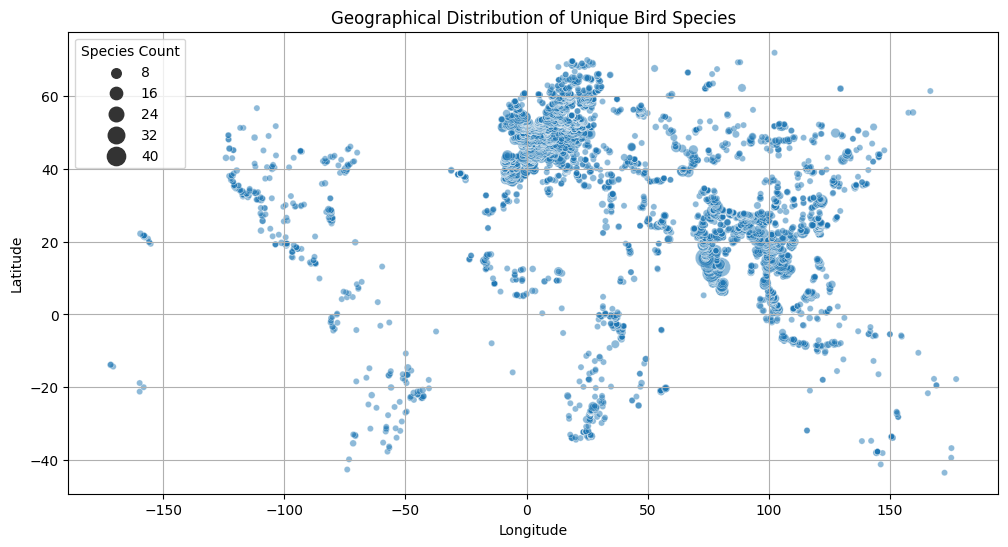

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the figure and axis
plt.figure(figsize=(12, 6))

# Plotting the number of unique species at each location
sns.scatterplot(x='longitude', y='latitude', size='species_count', sizes=(20, 200), alpha=0.5, data=location_species_count)

plt.title('Geographical Distribution of Unique Bird Species')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.legend(title='Species Count')
plt.show()

Create a machine learning model to predict the presence of bird species in soundscapes

In [28]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
primary_label_encoded = encoder.fit_transform(relevant_data[['primary_label']])

# Converting the encoded labels back to a DataFrame
encoded_labels_df = pd.DataFrame(primary_label_encoded, columns=encoder.categories_[0])
encoded_labels_df

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,asbfly,ashdro1,ashpri1,ashwoo2,asikoe2,asiope1,aspfly1,aspswi1,barfly1,barswa,...,whbwoo2,whcbar1,whiter2,whrmun,whtkin2,woosan,wynlau1,yebbab1,yebbul3,zitcis1
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
24455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
24456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
24457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [30]:
from sklearn.model_selection import train_test_split

# Features and target
X = relevant_data[['latitude', 'longitude']]
y = encoded_labels_df

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shapes of the splits
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((19567, 2), (4892, 2), (19567, 182), (4892, 182))

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.impute import SimpleImputer

# Features and targets
X = relevant_data[['latitude', 'longitude']]
y = encoded_labels_df

# Fill NaN values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Setting up the Random Forest classifier for multi-label classification
forest = RandomForestClassifier(n_estimators=100, random_state=42)
model = MultiOutputClassifier(forest, n_jobs=-1)

# Training the model
model.fit(X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42),
                      n_jobs=-1)

In [33]:
from sklearn.metrics import accuracy_score, hamming_loss

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculating Hamming loss (which is the fraction of labels that are incorrectly predicted)
hammingloss = hamming_loss(y_test, y_pred)

(accuracy, hammingloss)

(0.18908421913327883, 0.005592220534984231)

The model's accuracy on the test set is approximately 18.93%, and the Hamming loss is about 0.56%.

Feature Engineering

In [36]:
# Extracting the numeric part from the filename and converting it to an integer
relevant_data['filename_numeric'] = relevant_data['filename'].str.extract('(\d+)').astype(int)

/tmp/ipykernel_34/2235002698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data['filename_numeric'] = relevant_data['filename'].str.extract('(\d+)').astype(int)


In [37]:
# Displaying the first few rows to confirm the new column
relevant_data[['filename', 'filename_numeric']].head()

,filename,filename_numeric
0,asbfly/XC134896.ogg,134896
1,asbfly/XC164848.ogg,164848
2,asbfly/XC175797.ogg,175797
3,asbfly/XC207738.ogg,207738
4,asbfly/XC209218.ogg,209218


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.impute import SimpleImputer

# Features and targets including the new 'filename_numeric' feature
X = relevant_data[['latitude', 'longitude', 'filename_numeric']]
y = encoded_labels_df

# Fill NaN values in the features
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Setting up the Random Forest classifier for multi-label classification
forest = RandomForestClassifier(n_estimators=100, random_state=42)
model = MultiOutputClassifier(forest, n_jobs=-1)

# Training the model
model.fit(X_train, y_train)

# Checking the shapes of the splits
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((19567, 3), (4892, 3), (19567, 182), (4892, 182))

In [39]:
from sklearn.metrics import accuracy_score, classification_report

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.36753883892068684
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.41      0.47        17
           1       0.27      0.18      0.21        17
           2       0.33      0.27      0.30        22
           3       0.71      0.31      0.43        16
           4       0.58      0.42      0.49        52
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         5
           8       0.80      0.80      0.80         5
           9       0.68      0.40      0.50        96
          10       0.37      0.28      0.32        94
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00         4
          13       0.89      0.78      0.83        40
          14       0.53      0.34      0.41       122
          15       0.43      0.12      0.18        26
          16       0.00     

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
